# Data preparation

In [65]:
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

In [66]:
df=pd.read_csv("../dataset-progetto/train.csv", skipinitialspace=True)

- I will convert the duration of the tracks from ms in minutes
- I will remove the popularity_confidence and feature_duration_ms columns.
- I will replace the missing values in the "time_signature" column with the median.
- I will replace the missing values in the "mode" column with the mode (most frequent value).
- I will sort the dataset by genre since there are 750 rows for each genre, and this ordering will enhance the readability of the dataframe.

In [67]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.53600,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,0.0805,0.283000,0.93400,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,0.0397,0.000089,0.80000,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.00127,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.09690,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


- I will convert the duration of the tracks from ms in minutes

In [96]:
df_copy = df.copy()
df_copy["duration_m"] = df["duration_ms"] / (60 * 1000)  # Converti da millisecondi a minuti
del df_copy['duration_ms']
# df_copy.head()
# cond = df_copy['duration_m'] < 0.5
# selected_columns = df_copy[cond][['duration_m']]
# print(selected_columns)
# df_copy.iloc[11931]

name                     The Exorsism Begins...
explicit                                  False
popularity                                    0
artists                              Leila Bela
album_name                          Angra Manyu
danceability                                0.0
energy                                     0.04
key                                           8
loudness                                -29.714
mode                                        NaN
speechiness                                 0.0
acousticness                              0.928
instrumentalness                          0.956
liveness                                  0.115
valence                                     0.0
tempo                                       0.0
features_duration_ms                       8587
time_signature                              0.0
n_beats                                     0.0
n_bars                                      0.0
popularity_confidence                   

Questa da vedere meglio che ci sono troppi outliers

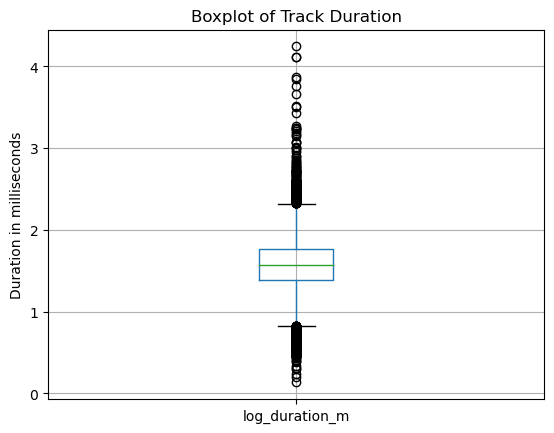

In [73]:
df_copy['log_duration_m'] = np.log(df_copy['duration_m'] + 1)
# Plot the log-transformed data
df_copy.boxplot(column=['log_duration_m'])
plt.title('Boxplot of Track Duration')
plt.ylabel('Duration in milliseconds')
plt.show()

I will sort the dataset by genre since there are 750 rows for each genre, and this ordering will enhance the readability of the dataframe.

In [ ]:
df_copy = df.sort_values(by='genre')
df_copy.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
10264,Love Came Down,293106,False,50,Kari Jobe,Where I Find You,0.401,0.683,8,-5.722,NaN,0.0401,0.181,0.000000,0.0837,0.226,135.951,293107,4.0,654.0,164.0,NaN,2.725904,afrobeat
10128,PIMP,194972,False,52,Bacao Rhythm & Steel Band,55,0.672,0.858,3,-5.233,NaN,0.1450,0.456,0.811000,0.1040,0.963,166.689,194973,4.0,537.0,133.0,NaN,1.738916,afrobeat
5408,Soul Saxes Meeting,178428,False,22,Manu Dibango,African Voodoo,0.636,0.826,3,-7.486,1.0,0.0585,0.461,0.271000,0.1410,0.731,102.809,178428,4.0,304.0,76.0,0.376,1.738916,afrobeat
1304,Reino Animal,238373,False,20,Los Amigos Invisibles,Repeat After Me,0.733,0.862,7,-5.813,1.0,0.0604,0.287,0.000532,0.4660,0.745,107.981,238373,4.0,427.0,106.0,NaN,4.067086,afrobeat
5430,La luna de espejos,221893,False,22,Jorge Drexler,Sus primeras grabaciones 1992-1994 (La luz que...,0.712,0.225,5,-10.017,1.0,0.0533,0.930,0.001000,0.1230,0.429,87.520,221893,4.0,317.0,78.0,NaN,1.279305,afrobeat


I will replace the missing values in the "mode" column with the mode (most frequent value) and i binarize the attribute

In [ ]:
df_copy['mode'] = df['mode'].fillna(df['mode'].mode()[0])
df_copy['mode'] = df_copy['mode'].astype(int) 

I will replace the missing values in the "time_signature" column with the median.

In [ ]:
df_copy['time_signature'] = df['time_signature'].fillna(df['time_signature'].median())

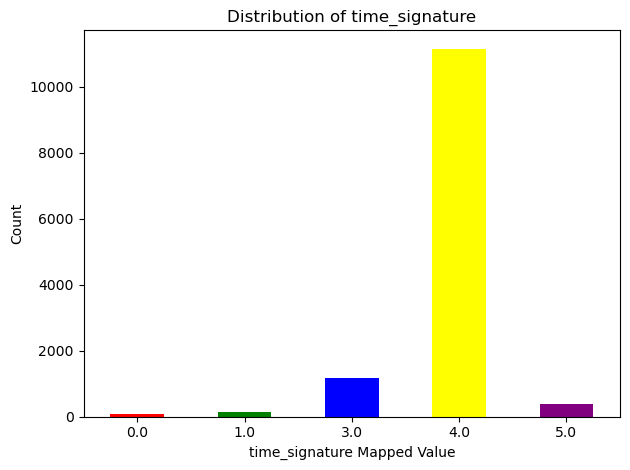

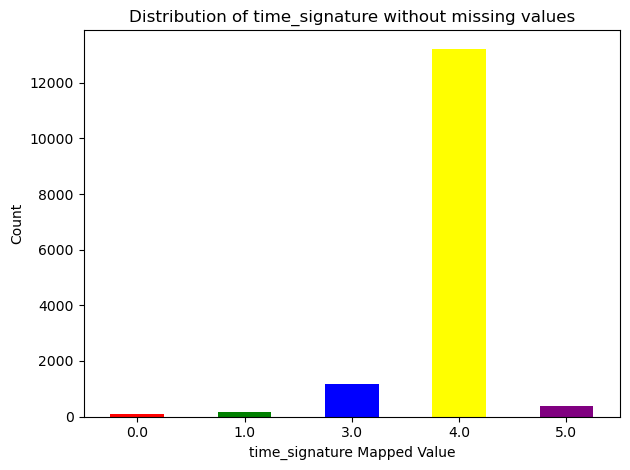

In [ ]:
df['time_signature'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'purple'])

# Imposta le etichette e il titolo
plt.xlabel('time_signature Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of time_signature')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

df_copy['time_signature'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'purple'])

# Imposta le etichette e il titolo
plt.xlabel('time_signature Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of time_signature without missing values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

I will remove the popularity_confidence and feature_duration_ms columns.

In [ ]:
del df_copy['popularity_confidence']

In [ ]:
del df_copy['features_duration_ms']

In [ ]:
df_copy.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
10264,Love Came Down,293106,False,50,Kari Jobe,Where I Find You,0.401,0.683,8,-5.722,1,0.0401,0.181,0.000000,0.0837,0.226,135.951,4.0,654.0,164.0,2.725904,afrobeat
10128,PIMP,194972,False,52,Bacao Rhythm & Steel Band,55,0.672,0.858,3,-5.233,1,0.1450,0.456,0.811000,0.1040,0.963,166.689,4.0,537.0,133.0,1.738916,afrobeat
5408,Soul Saxes Meeting,178428,False,22,Manu Dibango,African Voodoo,0.636,0.826,3,-7.486,1,0.0585,0.461,0.271000,0.1410,0.731,102.809,4.0,304.0,76.0,1.738916,afrobeat
1304,Reino Animal,238373,False,20,Los Amigos Invisibles,Repeat After Me,0.733,0.862,7,-5.813,1,0.0604,0.287,0.000532,0.4660,0.745,107.981,4.0,427.0,106.0,4.067086,afrobeat
5430,La luna de espejos,221893,False,22,Jorge Drexler,Sus primeras grabaciones 1992-1994 (La luz que...,0.712,0.225,5,-10.017,1,0.0533,0.930,0.001000,0.1230,0.429,87.520,4.0,317.0,78.0,1.279305,afrobeat


In [ ]:
df_copy.dtypes

name                 object
duration_ms           int64
explicit               bool
popularity            int64
artists              object
album_name           object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
n_beats             float64
n_bars              float64
processing          float64
genre                object
dtype: object

In [ ]:
df_copy.shape

(15000, 22)

{0.0: 0, 1.0: 1, nan: 2}


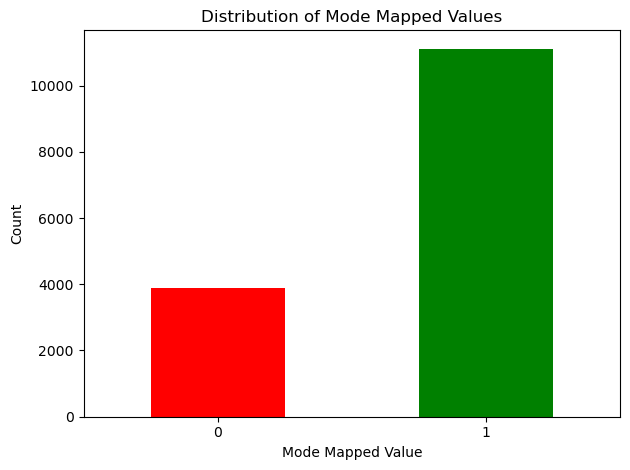

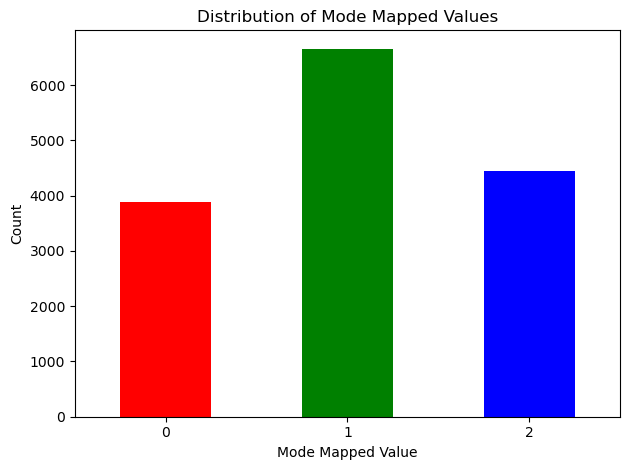

In [ ]:
df_copy['mode'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue'])

mode_order = sorted(df['mode'].unique())
mode_order_mapping = dict(zip(mode_order, range(0, len(mode_order) + 1)))
print(mode_order_mapping)

df['mode'] = df['mode'].map(mode_order_mapping).astype(int)
# Imposta le etichette e il titolo
plt.xlabel('Mode Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of Mode Mapped Values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

df['mode'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue'])

# Imposta le etichette e il titolo
plt.xlabel('Mode Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of Mode Mapped Values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
print(df_copy.isnull().sum())

name                0
duration_ms         0
explicit            0
popularity          0
artists             0
album_name          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
n_beats             0
n_bars              0
processing          0
genre               0
dtype: int64
